In [1]:
import pandas as pd
import dirty_data as d
import algorithms_class as a
from sklearn import tree
import matplotlib.pyplot as plt
import numpy as np
import imputation as i
import outlier_detection as od
from utils import encoding_categorical_variables as enc

In [2]:
df = pd.read_csv("../dataset/pet.csv")
name_class = 'AdoptionLikelihood'

selected_features = ['AgeMonths','Vaccinated','Size', name_class]
selected_features_only = ['AgeMonths','Vaccinated','Size']

df = df[selected_features]
quality = pd.DataFrame([70,75,80,85,90,95])
perc_quality = [70,75,80,85,90,95]

param = {
    'DecisionTree': 160,
    'LogisticRegression': 1,
    'KNN': 18,
    'RandomForest': 150,
    'AdaBoost': 70,
    'SVC': 1
}

models = ['DecisionTree','LogisticRegression','KNN','RandomForest','AdaBoost','SVC']

In [3]:
### DECISION TREE

In [4]:
### 100% quality
median, clf_100 = a.classification(df[selected_features_only], df[name_class], 'DecisionTree', param['DecisionTree'], 4)

Training for DecisionTree...
0.7840460049098533


In [5]:
### 90% quality
df_dirt_90 = d.injection(df, name_class, 90/100, 10, 1)
median, clf_90 = a.classification(df_dirt_90[selected_features_only], df_dirt_90[name_class], 'DecisionTree', param['DecisionTree'], 4)

saved dirty dataset 90%
Training for DecisionTree...
0.7630550524741697


In [6]:
### 50% quality
df_dirt_50 = d.injection(df, name_class, 50/100, 10, 1)
median, clf_50 = a.classification(df_dirt_50[selected_features_only], df_dirt_50[name_class], 'DecisionTree', param['DecisionTree'], 4)


saved dirty dataset 50%
Training for DecisionTree...
0.6408789168524097


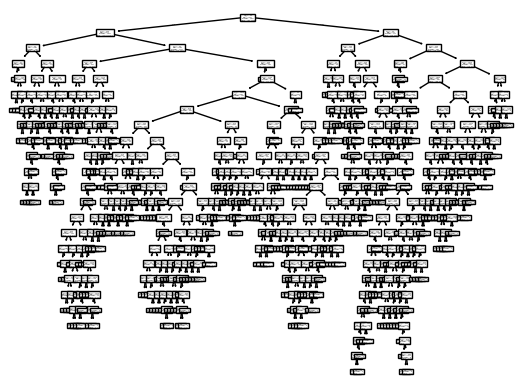

In [11]:
clf_100 = clf_100.fit(enc(df[selected_features_only]), df[name_class])
tree.plot_tree(clf_100)
plt.savefig("/Users/camillasancricca/Desktop/" + 'DT100' + ".pdf", bbox_inches='tight')
plt.show()

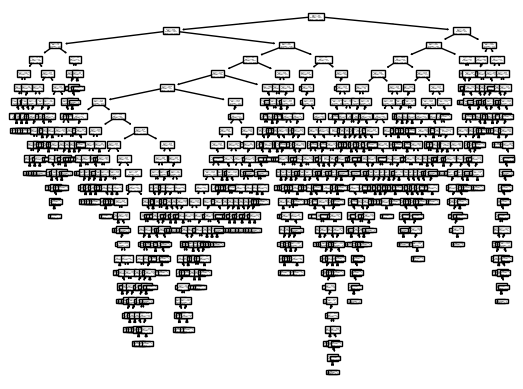

In [12]:
clf_90 = clf_90.fit(enc(df_dirt_90[selected_features_only]), df_dirt_90[name_class])
tree.plot_tree(clf_90)
plt.savefig("/Users/camillasancricca/Desktop/" + 'DT90' + ".pdf", bbox_inches='tight')
plt.show()

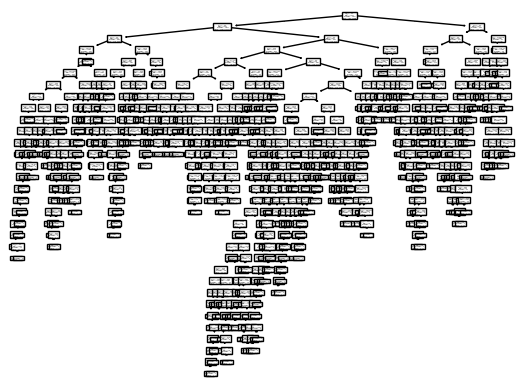

In [13]:
clf_50 = clf_50.fit(enc(df_dirt_50[selected_features_only]), df_dirt_50[name_class])
tree.plot_tree(clf_50)
plt.savefig("/Users/camillasancricca/Desktop/" + 'DT50' + ".pdf", bbox_inches='tight')
plt.show()


In [28]:
def improve_completeness(df, imp_1, imp_2, imp_3, imp_col_1, imp_col_2, imp_col_3, algorithm, name_class):
    df_clean = df[selected_features_only].copy()

    df_clean = i.impute(df_clean, imp_1, imp_col_1)
    df_clean = i.impute(df_clean, imp_2, imp_col_2)
    df_clean = i.impute(df_clean, imp_3, imp_col_3)

    df_clean[name_class] = df[name_class]

    return df_clean

def improve_accuracy(df, od_1, imp_1, imp_2, imp_3, imp_col_1, imp_col_2, imp_col_3, algorithm, name_class):
    df_clean = df[selected_features_only].copy()

    indexes_1 = od.outliers(df_clean, od_1, selected_features[0])

    df_clean.loc[indexes_1,selected_features[0]] = np.nan

    df_clean[name_class] = df[name_class]

    df_clean = improve_completeness(df_clean, imp_1, imp_2, imp_3, imp_col_1, imp_col_2, imp_col_3, algorithm, name_class)

    return df_clean


In [20]:
### quality 50% step by step trees

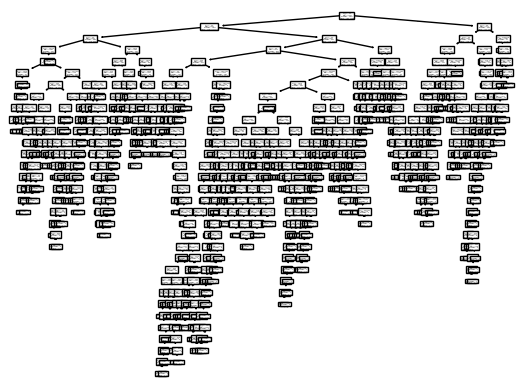

In [17]:
df_clean = improve_completeness(df_dirt_50, 'impute_standard', 'impute_standard', 'impute_standard', 'AgeMonths','Vaccinated','Size', 'DecisionTree', name_class)
clf_50 = clf_50.fit(enc(df_clean[selected_features_only]), df_clean[name_class])
tree.plot_tree(clf_50)
plt.savefig("/Users/camillasancricca/Desktop/" + 'DT50_com' + ".pdf", bbox_inches='tight')
plt.show()

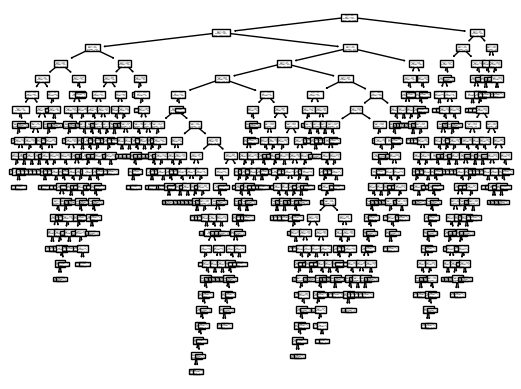

In [21]:
df_clean = improve_accuracy(df_clean, 'ZSB', 'impute_standard', 'impute_standard', 'impute_standard', 'AgeMonths','Vaccinated','Size', 'DecisionTree', name_class)
clf_50 = clf_50.fit(enc(df_clean[selected_features_only]), df_clean[name_class])
tree.plot_tree(clf_50)
plt.savefig("/Users/camillasancricca/Desktop/" + 'DT50_acc' + ".pdf", bbox_inches='tight')
plt.show()

In [23]:
### quality 90% step by step trees

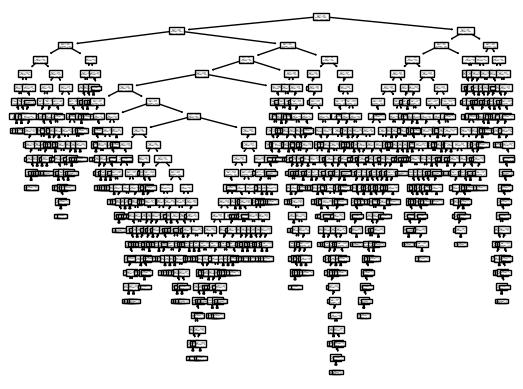

In [25]:
df_clean = improve_completeness(df_dirt_90, 'impute_standard', 'impute_standard', 'impute_standard','AgeMonths','Vaccinated','Size', 'DecisionTree', name_class)
clf_50 = clf_50.fit(enc(df_clean[selected_features_only]), df_clean[name_class])
tree.plot_tree(clf_50)
plt.savefig("/Users/camillasancricca/Desktop/" + 'DT90_com' + ".pdf", bbox_inches='tight')
plt.show()

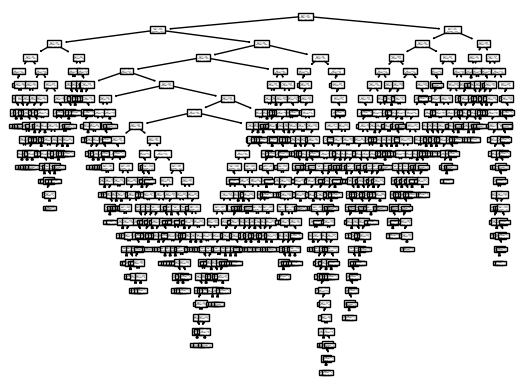

In [27]:
df_clean = improve_accuracy(df_clean, 'ZSB', 'impute_standard',
                                                                'impute_standard', 'impute_standard', 'AgeMonths','Vaccinated','Size', 'DecisionTree',
                                                                name_class)
clf_50 = clf_50.fit(enc(df_clean[selected_features_only]), df_clean[name_class])
tree.plot_tree(clf_50)
plt.savefig("/Users/camillasancricca/Desktop/" + 'DT90_acc' + ".pdf", bbox_inches='tight')
plt.show()


In [3]:
### SVC

In [4]:
### 100% quality
median, clf_100 = a.classification(df[selected_features_only], df[name_class], 'SVC', param['SVC'], 4)

Training for SVC...
0.7470238025326605


In [5]:
### 90% quality
df_dirt_90 = d.injection(df, name_class, 90 / 100, 10, 1)
median, clf_90 = a.classification(df_dirt_90[selected_features_only], df_dirt_90[name_class], 'SVC',
                                  param['SVC'], 4)

saved dirty dataset 90%
Training for SVC...
0.5322797073349979


In [6]:
### 50% quality
df_dirt_50 = d.injection(df, name_class, 50 / 100, 10, 1)
median, clf_50 = a.classification(df_dirt_50[selected_features_only], df_dirt_50[name_class], 'SVC',
                                  param['SVC'], 4)

saved dirty dataset 50%
Training for SVC...
0.6869449310462664


In [19]:
clf_100 = clf_100.fit(enc(df[selected_features_only]), df[name_class])
importances = clf_100.coef_
importances

array([[ 0.05781792,  0.78810424, -0.78810424,  0.        ,  0.60224999,
        -1.03937413,  0.43712414,  0.        ]])

In [24]:
clf_90 = clf_90.fit(enc(pd.DataFrame(np.nan_to_num(df_dirt_90[selected_features_only]))), df_dirt_90[name_class])
importances = clf_90.coef_
importances

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  9.55729167e-01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -8.75000000e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -1.00000000e+00,  0.00000000e+00, -2.50000000e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -9.49833623e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+0

In [25]:
clf_50 = clf_50.fit(enc(pd.DataFrame(np.nan_to_num(df_dirt_90[selected_features_only]))), df_dirt_50[name_class])
importances = clf_50.coef_
importances

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  9.55729167e-01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -8.75000000e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -1.00000000e+00,  0.00000000e+00, -2.50000000e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -9.49833623e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+0

In [29]:
def improve_accuracy(df, od_1, imp_1, imp_2, imp_3, imp_col_1, imp_col_2, imp_col_3, algorithm, name_class, clf):
    df_clean = df[selected_features_only].copy()

    indexes_1 = od.outliers(df_clean, od_1, selected_features[0])

    df_clean.loc[indexes_1,selected_features[0]] = np.nan

    df_clean[name_class] = df[name_class]

    clf = clf.fit(df_clean[selected_features_only], df_clean[name_class])

    df_clean = improve_completeness(df_clean, imp_1, imp_2, imp_3, imp_col_1, imp_col_2, imp_col_3, algorithm, name_class)

    return df_clean, clf.feature_importances_

In [30]:
### quality 50% step by step trees

In [32]:
df_clean, importances_1 = improve_accuracy(df_dirt_50, 'ZSB', 'impute_knn', 'impute_knn', 'impute_knn',
                            'AgeMonths','Vaccinated','Size', 'SVC', name_class, clf_50)

clf_50 = clf_50.fit(enc(df_clean[selected_features_only]), df_clean[name_class])
importances = clf_50.coef_
importances


KeyError: "['Vaccinated', 'Size'] not in index"

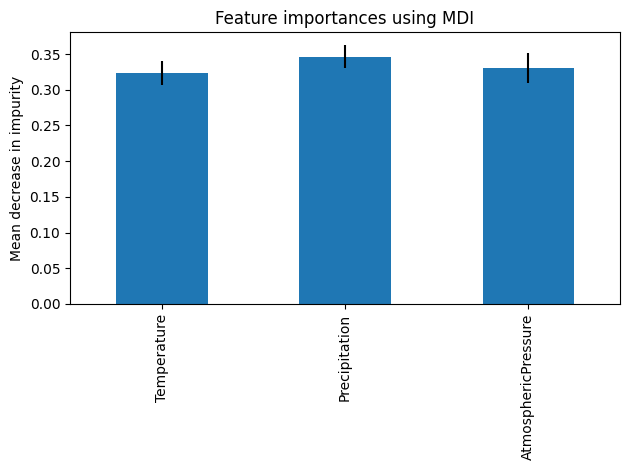

In [26]:
### quality 90% step by step trees
df_clean, importances_1 = improve_accuracy(df_dirt_90, 'IQR', 'ZSB', 'ZSB', 'impute_standard', 'impute_standard',
                                           'impute_standard',
                                           'Temperature', 'Precipitation', 'AtmosphericPressure', 'DecisionTree',
                                           name_class, clf_90)

clf_90 = clf_90.fit(df_clean[selected_features_only], df_clean[name_class])
importances_2 = clf_90.feature_importances_

forest_importances = pd.Series(importances_1, index=['Temperature', 'Precipitation', 'AtmosphericPressure'])
std = np.std([tree.feature_importances_ for tree in clf_50.estimators_], axis=0)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
plt.savefig("/Users/camillasancricca/Desktop/" + 'RF90_acc' + ".pdf", bbox_inches='tight')
fig.tight_layout()

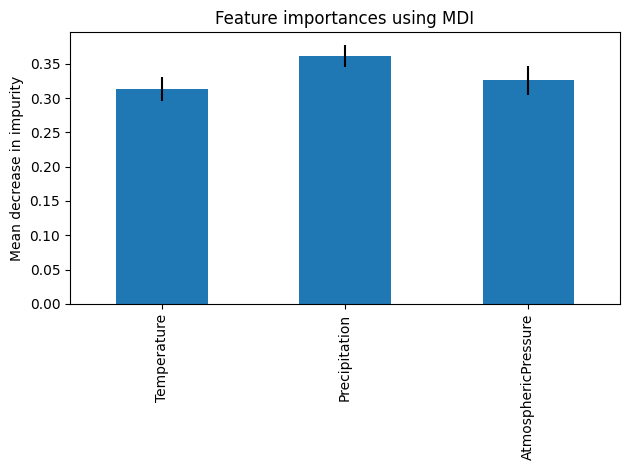

In [27]:
forest_importances = pd.Series(importances_2, index=['Temperature', 'Precipitation', 'AtmosphericPressure'])
std = np.std([tree.feature_importances_ for tree in clf_50.estimators_], axis=0)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
plt.savefig("/Users/camillasancricca/Desktop/" + 'RF90_com' + ".pdf", bbox_inches='tight')
fig.tight_layout()


In [41]:
### which are the best techniques?

schedule = pd.read_csv('schedule/compiled_sample_schedule.csv')
suggested = pd.read_csv('schedule/compiled_schedule_suggested.csv')


In [ ]:
### suggested impute_standard,impute_standard,impute_standard,IQR,ZSB,ZSB

In [70]:
sss = schedule[(schedule['RandomForest_2'] > 0.828) & (schedule['quality'] == 90)]
sss = sss[['imp_1','imp_2','imp_3','od_1','od_2','od_3']]

In [71]:
sss

,imp_1,imp_2,imp_3,od_1,od_2,od_3
3199,impute_standard,impute_mice,impute_linear_regression,IQR,ISO,STD
3734,impute_mean,impute_knn,impute_linear_regression,IQR,ISO,STD
3824,impute_mean,impute_mice,impute_linear_regression,IQR,ISO,STD
92089,impute_mean,impute_mice,impute_cmeans,IQR,ISO,STD
92174,impute_mean,impute_random_forest,impute_cmeans,IQR,ISO,STD
93154,impute_mice,impute_linear_regression,impute_cmeans,IQR,ISO,STD
94669,impute_mean,impute_linear_regression,impute_cmeans,IQR,ISO,ZSB
100979,impute_standard,impute_mean,impute_random_forest,IQR,PERC,STD
100994,impute_standard,impute_mean,impute_cmeans,IQR,PERC,STD
101149,impute_standard,impute_median,impute_random_forest,IQR,PERC,STD


In [72]:
sss.imp_1.value_counts()


imp_1
impute_mean        13
impute_standard     8
impute_mice         4
impute_median       1
Name: count, dtype: int64

In [73]:
sss.imp_2.value_counts()


imp_2
impute_mice                 10
impute_linear_regression     9
impute_median                3
impute_mean                  2
impute_knn                   1
impute_random_forest         1
Name: count, dtype: int64

In [74]:
sss.imp_3.value_counts()


imp_3
impute_cmeans               18
impute_random_forest         5
impute_linear_regression     3
Name: count, dtype: int64

In [75]:
sss.od_1.value_counts()

od_1
IQR    25
STD     1
Name: count, dtype: int64

In [76]:
sss.od_2.value_counts()

od_2
PERC    16
ISO      7
STD      2
ZSB      1
Name: count, dtype: int64

In [77]:
sss.od_3.value_counts()


od_3
STD    22
ZSB     3
LOF     1
Name: count, dtype: int64